# Earthquake Prediction



In [62]:
import numpy as np
import pandas as pd
import requests
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import time

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/earthquake1.csv")

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24007 entries, 0 to 24006
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         24007 non-null  float64
 1   date       24007 non-null  object 
 2   time       24007 non-null  object 
 3   lat        24007 non-null  float64
 4   long       24007 non-null  float64
 5   country    24007 non-null  object 
 6   city       11754 non-null  object 
 7   area       12977 non-null  object 
 8   direction  10062 non-null  object 
 9   dist       10062 non-null  float64
 10  depth      24007 non-null  float64
 11  xm         24007 non-null  float64
 12  md         24007 non-null  float64
 13  richter    24007 non-null  float64
 14  mw         5003 non-null   float64
 15  ms         24007 non-null  float64
 16  mb         24007 non-null  float64
dtypes: float64(11), object(6)
memory usage: 3.1+ MB


In [66]:
df.describe()

,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [67]:
df.shape

(24007, 17)

In [68]:
df.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [69]:
df.columns

Index(['id', 'date', 'time', 'lat', 'long', 'country', 'city', 'area',
       'direction', 'dist', 'depth', 'xm', 'md', 'richter', 'mw', 'ms', 'mb'],
      dtype='object')

Data Preprocessing

In [70]:
df = df.drop('id',axis=1)

In [71]:
import datetime

now = datetime.datetime.now()

current_date = now.date()

current_time = now.time()

print("Current Date:", current_date)

formatted_time = current_time.strftime("%H:%M:%S")
print("Formatted time:", formatted_time)


Current Date: 2024-05-31
Formatted time: 17:54:10


In [72]:
df.dtypes

date          object
time          object
lat          float64
long         float64
country       object
city          object
area          object
direction     object
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
dtype: object

In [73]:
# Data Encoding
label_encoder = preprocessing.LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
      label_encoder.fit(df[col])
      df[col] = label_encoder.transform(df[col])
df.dtypes

date           int64
time           int64
lat          float64
long         float64
country        int64
city           int64
area           int64
direction      int64
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
dtype: object

In [74]:
df.isnull().sum()

date             0
time             0
lat              0
long             0
country          0
city             0
area             0
direction        0
dist         13945
depth            0
xm               0
md               0
richter          0
mw           19004
ms               0
mb               0
dtype: int64

In [75]:
df=df.drop('mw',axis=1)
df=df.drop('date',axis=1)
df=df.drop('time',axis=1)
df

,lat,long,country,city,area,direction,dist,depth,xm,md,richter,ms,mb
0,39.04,40.38,19,16,618,7,0.1,10.0,4.1,4.1,0.0,0.0,0.0
1,40.79,30.09,19,57,704,7,0.1,5.2,4.0,3.8,4.0,0.0,0.0
2,38.58,27.61,19,63,2445,6,0.1,0.0,3.7,0.0,0.0,0.0,3.7
3,39.47,36.44,19,81,2730,6,0.1,10.0,3.5,3.5,0.0,0.0,0.0
4,40.80,30.24,19,75,3668,6,0.1,7.0,4.3,4.3,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,37.50,38.48,19,1,3207,8,NaN,13.0,4.2,0.0,4.2,0.0,0.0
24003,40.47,35.84,19,5,3275,8,NaN,5.6,3.6,0.0,3.5,0.0,0.0
24004,38.63,27.57,19,63,1190,8,NaN,10.6,4.1,0.0,4.0,0.0,0.0
24005,38.65,27.55,19,63,1190,8,NaN,8.7,3.8,0.0,3.6,0.0,0.0


In [76]:
df=df.drop('dist',axis=1)
df

,lat,long,country,city,area,direction,depth,xm,md,richter,ms,mb
0,39.04,40.38,19,16,618,7,10.0,4.1,4.1,0.0,0.0,0.0
1,40.79,30.09,19,57,704,7,5.2,4.0,3.8,4.0,0.0,0.0
2,38.58,27.61,19,63,2445,6,0.0,3.7,0.0,0.0,0.0,3.7
3,39.47,36.44,19,81,2730,6,10.0,3.5,3.5,0.0,0.0,0.0
4,40.80,30.24,19,75,3668,6,7.0,4.3,4.3,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24002,37.50,38.48,19,1,3207,8,13.0,4.2,0.0,4.2,0.0,0.0
24003,40.47,35.84,19,5,3275,8,5.6,3.6,0.0,3.5,0.0,0.0
24004,38.63,27.57,19,63,1190,8,10.6,4.1,0.0,4.0,0.0,0.0
24005,38.65,27.55,19,63,1190,8,8.7,3.8,0.0,3.6,0.0,0.0


Data Visualization

In [77]:
import plotly.express as px
px.scatter(df, x='richter',y='xm', color="direction")

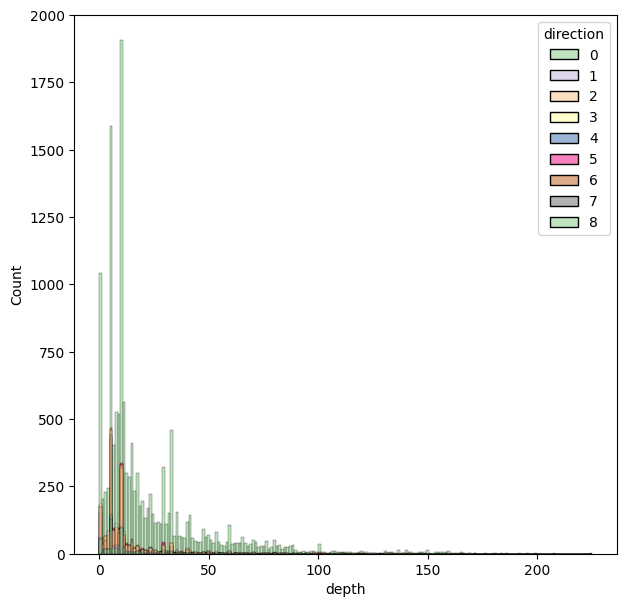

In [78]:
plt.figure(figsize=(7,7))
sns.histplot(data=df, x='depth', hue='direction',palette = 'Accent')
plt.show()

<Figure size 700x700 with 0 Axes>

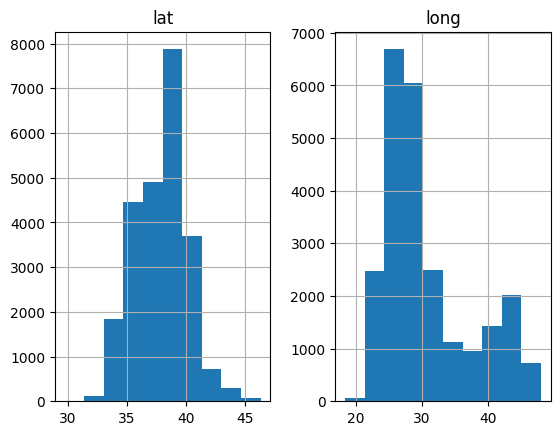

In [79]:
plt.figure(figsize=(7,7))
df[['lat','long']].hist()
plt.show()

<ipython-input-80-2795e4c6156c>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='xm', ylabel='Density'>

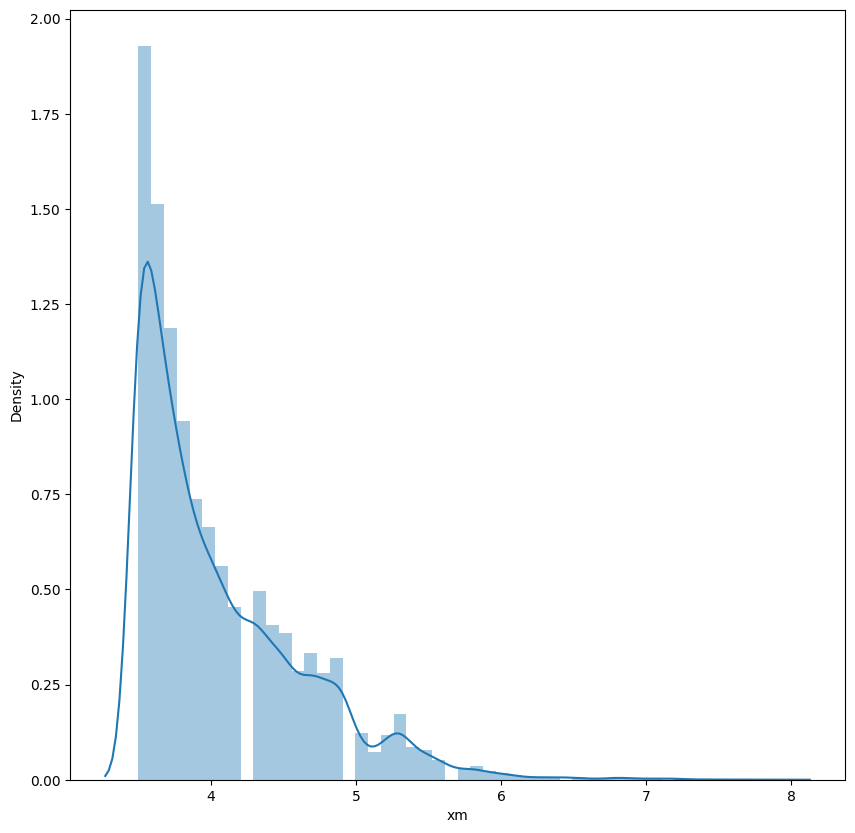

In [80]:
plt.figure(figsize=(10,10))
sns.distplot(df.xm)

Text(0, 0.5, 'ms')

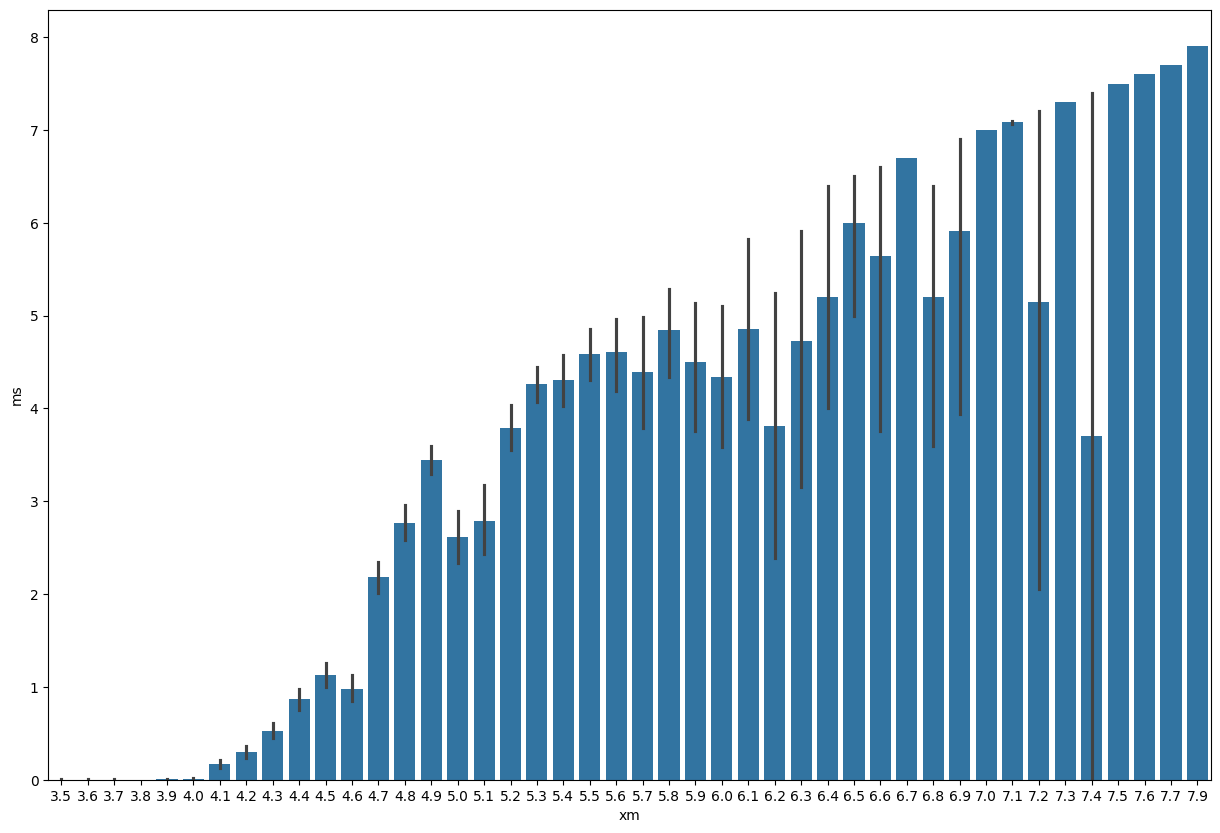

In [81]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['xm'], y=df['ms'])
plt.xlabel('xm')
plt.ylabel('ms')

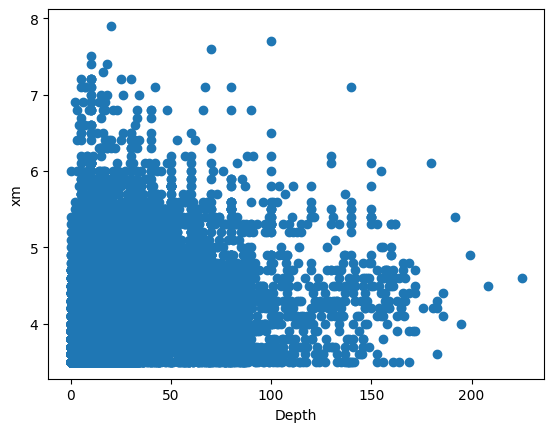

In [82]:
plt.scatter(df.depth, df.xm)
plt.xlabel("Depth")
plt.ylabel("xm")
plt.show()

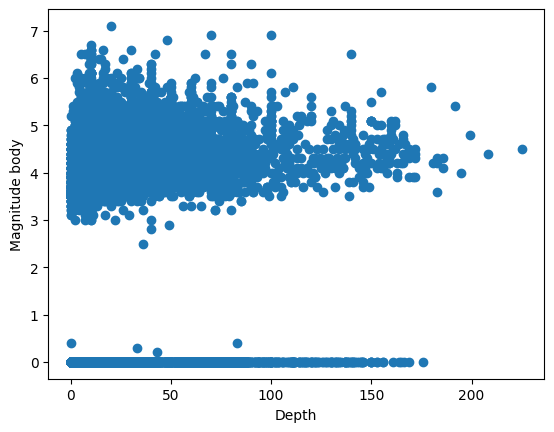

In [83]:
plt.scatter(df.depth, df.mb)
plt.xlabel("Depth")
plt.ylabel("Magnitude body")
plt.show()

Correlation between Attributes

In [84]:
most_correlated = df.corr()['xm'].sort_values(ascending=False)
most_correlated

xm           1.000000
ms           0.699579
mb           0.628382
richter      0.426653
depth        0.302926
md           0.241432
area         0.125275
city         0.107436
direction    0.087696
long         0.071856
lat         -0.010347
country     -0.056115
Name: xm, dtype: float64

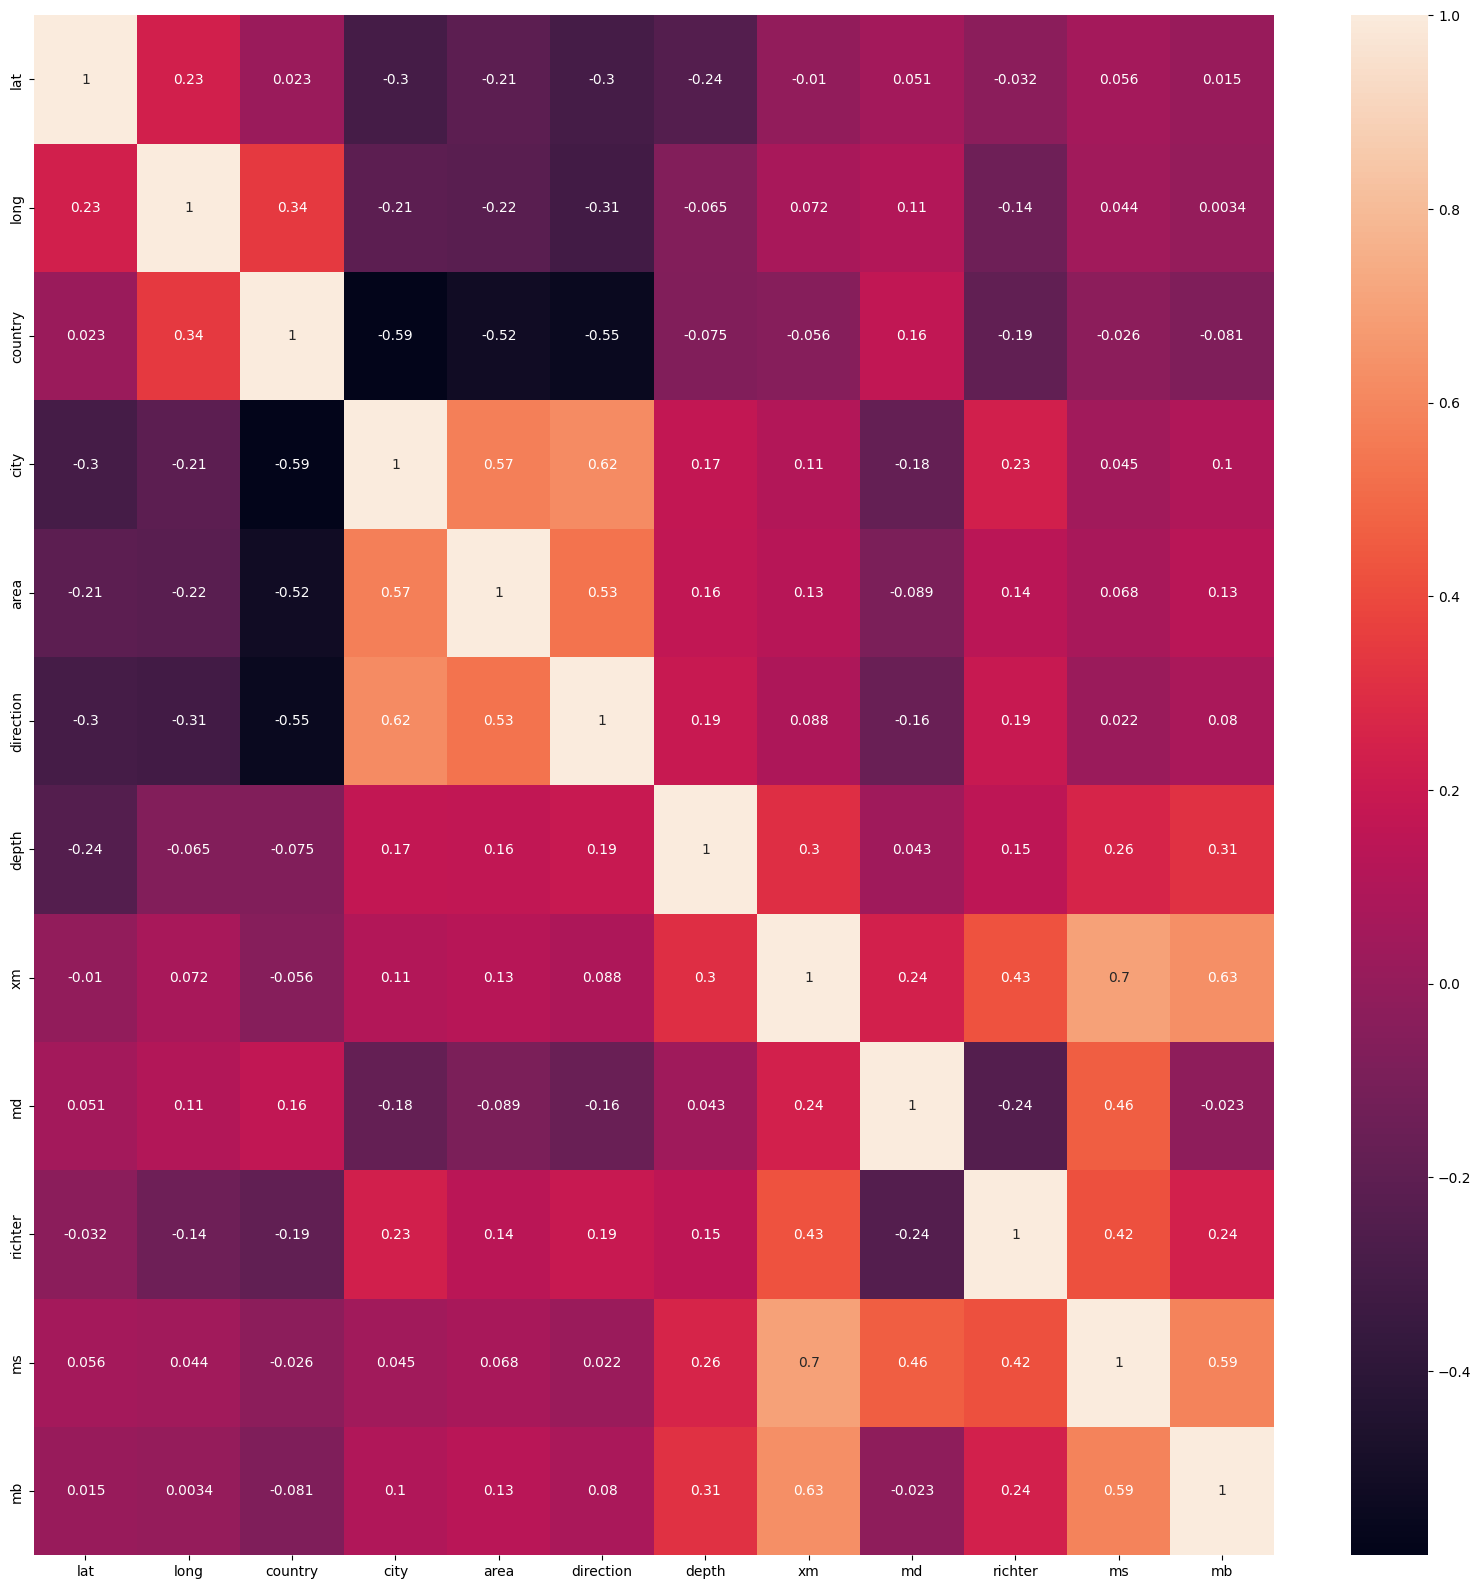

In [85]:
plt.figure(figsize=(20,20))
dataplot=sns.heatmap(df.corr(),annot=True)
plt.show()

Normalization of data

In [86]:
# Using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=df.columns)
df.head()

,lat,long,country,city,area,direction,depth,xm,md,richter,ms,mb
0,0.559904,0.743088,0.76,0.172043,0.116144,0.875,0.044444,0.136364,0.554054,0.000000,0.0,0.000000
1,0.665262,0.396156,0.76,0.612903,0.132306,0.875,0.023111,0.113636,0.513514,0.555556,0.0,0.000000
2,0.532210,0.312542,0.76,0.677419,0.459500,0.750,0.000000,0.045455,0.000000,0.000000,0.0,0.521127
3,0.585792,0.610249,0.76,0.870968,0.513061,0.750,0.044444,0.000000,0.472973,0.000000,0.0,0.000000
4,0.665864,0.401214,0.76,0.806452,0.689344,0.750,0.031111,0.181818,0.581081,0.000000,0.0,0.000000


In [87]:
y=np.array(df['xm'])
X=np.array(df.drop('xm',axis=1))
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

Splitting the Dataset

In [88]:
df.columns

Index(['lat', 'long', 'country', 'city', 'area', 'direction', 'depth', 'xm',
       'md', 'richter', 'ms', 'mb'],
      dtype='object')

Creating Models

1. Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression
start1 = time.time()
linear=LinearRegression()
linear.fit(X_train,y_train)
ans1 = linear.predict(X_test)
end1 = time.time()
t1 = end1-start1

In [90]:
accuracy1=linear.score(X_test,y_test)
print("Accuracy of Linear Regression model is:",accuracy1)

Accuracy of Linear Regression model is: 0.623016126319649


In [91]:
from sklearn import metrics
print("Linear Regression")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans1)))

Linear Regression
Mean Absolute Error: 0.05882299754611697
Mean Squared Error: 0.006399598336258973
Root Mean Squared Error: 0.07999748956222923


Text(0, 0.5, 'Predicted Magnitude')

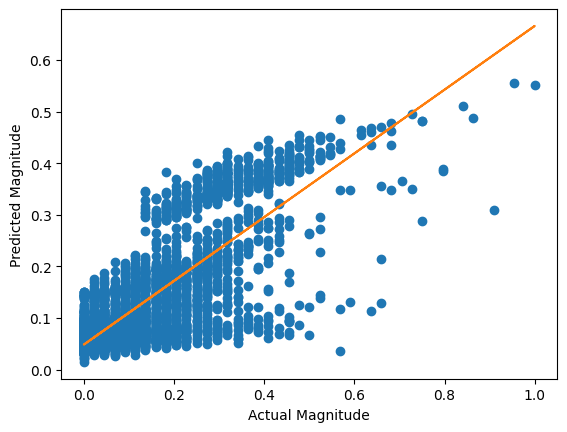

In [92]:
plt.plot(y_test, ans1, 'o')
m, b = np.polyfit(y_test,ans1, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

In [93]:
y=np.array(df['xm'])
X=np.array(df.drop('xm',axis=1))
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.tree import DecisionTreeRegressor
start2 = time.time()
regressor = DecisionTreeRegressor(random_state = 40)
regressor.fit(X_train,y_train)
ans2 = regressor.predict(X_test)
end2 = time.time()
t2 = end2-start2

2. Decision Tree

In [94]:
accuracy2=regressor.score(X_test,y_test)
print("Accuracy of Decision Tree model is:",accuracy2)

Accuracy of Decision Tree model is: 0.9851854981003159


In [95]:
print("Decision Tree")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans2)))

Decision Tree
Mean Absolute Error: 0.003180492976411522
Mean Squared Error: 0.00025148784425222266
Root Mean Squared Error: 0.015858368272058214


3. KNN Model


In [96]:
from sklearn.neighbors import KNeighborsRegressor
start3 = time.time()
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
ans3 = knn.predict(X_test)
end3 = time.time()
t3 = end3-start3

In [97]:
accuracy3=knn.score(X_test,y_test)
print("Accuracy of KNN model is:",accuracy3)

Accuracy of KNN model is: 0.8519715003484873


In [98]:
print("KNN Model")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans3)))

KNN Model
Mean Absolute Error: 0.030934080496762717
Mean Squared Error: 0.002512900434812706
Root Mean Squared Error: 0.0501288383549101


In [99]:
import random
info = {}
for i in range(10):
  k = random.randint(2,10)
  startk = time.time()
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, y_train)
  ans3 = knn.predict(X_test)
  endk = time.time()
  tk = endk-startk
  acc3=knn.score(X_test,y_test)
  info[k] = [acc3,tk]

for i in info:
  print("for k =",i,": accuracy =",info[i][0])

for k = 4 : accuracy = 0.8603718939056026
for k = 5 : accuracy = 0.856294515909487
for k = 7 : accuracy = 0.848131764415672
for k = 9 : accuracy = 0.8433520023124556
for k = 8 : accuracy = 0.8450548363250294
for k = 3 : accuracy = 0.8641264745927177
for k = 10 : accuracy = 0.8393051082647013


Text(0.5, 1.0, 'Accuracy for different values of k')

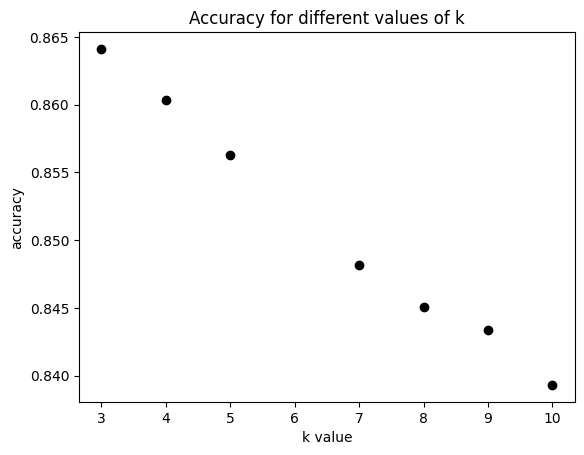

In [100]:
x = list(info.keys())
yacc = []
for i in info:
  yacc.append(info[i][0])
plt.plot(x, yacc, 'o', color='black');
plt.xlabel("k value")
plt.ylabel("accuracy");
plt.title("Accuracy for different values of k")

Text(0.5, 1.0, 'Execution time for different values of k')

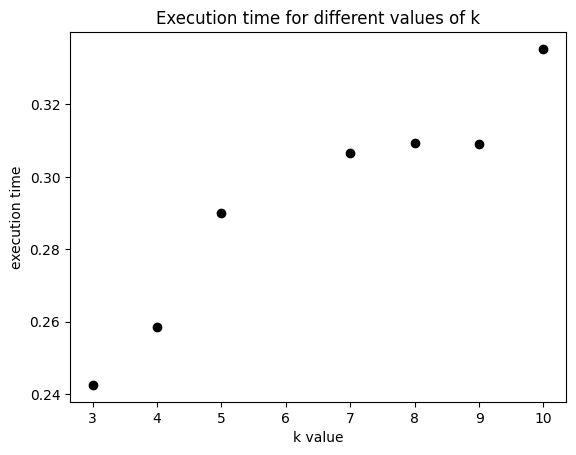

In [101]:
yt = []
for i in info:
  yt.append(info[i][1])
plt.plot(x, yt, 'o', color='black');
plt.xlabel("k value")
plt.ylabel("execution time");
plt.title("Execution time for different values of k")

Comparison Graphs

1. Accuracy

In [102]:
models = ["linear regression","decision tree","knn"]
accuracies = [accuracy1,accuracy2,accuracy3]

Text(0.5, 1.0, 'Accuracy Comparison Graph')

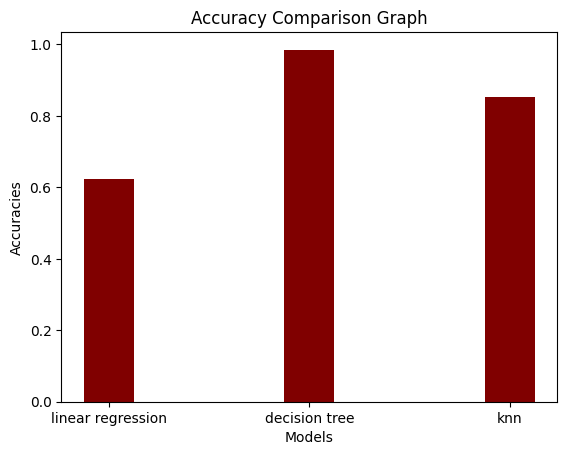

In [103]:
plt.bar(models, accuracies, color ='maroon',
        width = 0.25)
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("Accuracy Comparison Graph")

2. Execution Time

Text(0.5, 1.0, 'Execution Time Comparison Graph')

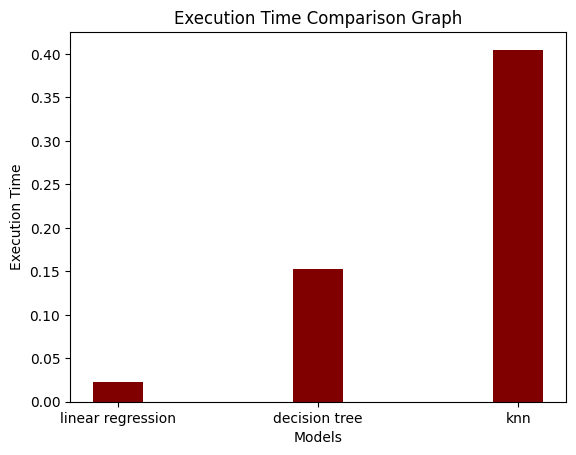

In [104]:
times = [t1,t2,t3]
plt.bar(models, times, color ='maroon',
        width = 0.25)
plt.xlabel("Models")
plt.ylabel("Execution Time")
plt.title("Execution Time Comparison Graph")

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
!pip install catboost

In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import time

df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/earthquake1.csv")

df = df.drop(['id', 'mw', 'dist', 'date', 'time'], axis=1)

df.fillna('missing', inplace=True)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(df)

y = df['xm']
X = df.drop('xm', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
catboost_model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, cat_features=categorical_cols, silent=True)

cv_scores = cross_val_score(catboost_model, X, y, cv=kfold, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(catboost_model, X, y, cv=kfold, scoring='r2')

print("Cross-Validation MSE Scores:", -cv_scores)
print("Cross-Validation MSE Mean:", -cv_scores.mean())
print("Cross-Validation R^2 Scores:", cv_r2_scores)
print("Cross-Validation R^2 Mean:", cv_r2_scores.mean())

start_time = time.time()
catboost_model.fit(X_train, y_train)
end_time = time.time()

y_test_pred = catboost_model.predict(X_test)

y_train_pred = catboost_model.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Training R^2: {train_r2}")
print(f"Test MSE: {test_mse}")
print(f"Test R^2: {test_r2}")
print(f"Training time: {end_time - start_time} seconds")

print("CatBoost Model")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(test_mse))


         lat   long country      city                 area   direction  depth  \
0      39.04  40.38  turkey    bingol           baliklicay        west   10.0   
1      40.79  30.09  turkey   kocaeli      bayraktar_izmit        west    5.2   
2      38.58  27.61  turkey    manisa           hamzabeyli  south_west    0.0   
3      39.47  36.44  turkey     sivas  kahvepinar_sarkisla  south_west   10.0   
4      40.80  30.24  turkey   sakarya      meseli_serdivan  south_west    7.0   
...      ...    ...     ...       ...                  ...         ...    ...   
24002  37.50  38.48  turkey  adiyaman      kirmacik_samsat     missing   13.0   
24003  40.47  35.84  turkey    amasya              kizoglu     missing    5.6   
24004  38.63  27.57  turkey    manisa            cavusoglu     missing   10.6   
24005  38.65  27.55  turkey    manisa            cavusoglu     missing    8.7   
24006  38.63  27.58  turkey    manisa            cavusoglu     missing    9.0   

        xm   md  richter   

In [115]:
user_input = {

    'lat': float(input('Enter Latitude: ')),
    'long': float(input('Enter Logitute: ')),
    'country': (input('Enter country : ')),
    'city': (input('Enter city: ')),
    'area': (input('Enter area: ')),
    'direction': (input('Enter direction: ')),
    'depth': float(input('Enter depth: ')),
    'md': float(input('Enter md: ')),
    'richter': float(input('Enter ritcher: ')),
    'ms': float(input('Enter ms: ')),
    'mb': float(input('Enter mb: ')),
}


user_df = pd.DataFrame([user_input])
user_voting_prediction = catboost_model.predict(user_df)[0]

print('\nPredicted Earthquake magnitute: {:.2f}'.format(user_voting_prediction))


Enter Latitude: 39.04
Enter Logitute: 10.38
Enter country : turkey
Enter city: bingol
Enter area: baliklicay
Enter direction: west
Enter depth: 10.0
Enter md: 4.1
Enter ritcher: 0.0
Enter ms: 0.0
Enter mb: 0.0

Predicted Earthquake magnitute: 4.28


#**Report on Earthquake Magnitude Prediction**

---

**Introduction**


Earthquake magnitite prediction is really important because it helps us prepare for and deal with the damage caused by earthquakes. Knowing how strong an earthquake might be can help us get ready for it and reduce the harm it can cause. So, we're going to look at how we can use computer programs to guess how strong an earthquake might be by looking at different things like where it happens and how deep it is underground.

---

**Data Preprocessing**

We began by loading the earthquake dataset and performing an initial exploration. The dataset contained attributes such as latitude, longitude, depth, magnitude, and others. We observed that the dataset included categorical variables like country, city, and area, which needed encoding before applying machine learning models. Additionally, we identified missing values and performed necessary imputation.

---

**Feature Engineering and Model Selection**

Initially, we applied multiple machine learning models, **including Linear Regression, Decision Tree, and KNN,**  to predict earthquake magnitudes. However, we encountered challenges with categorical variables, particularly in models like KNN, which do not inherently handle categorical data.

To address this issue, we decided to remove the 'date' and 'time' features, which were categorical and not directly relevant to earthquake magnitude prediction. This allowed us to focus on numerical attributes, simplifying the modeling process.

---

**Model Evaluation**

After preprocessing the data, we trained and evaluated the models using appropriate performance metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Accuracy. We also considered the execution time for each model.

The Decision Tree model exhibited good accuracy but had limitations in handling complex relationships. KNN showed good results but required careful handling of categorical variables.

---

**Introduction of CatBoost Model**

To address the categorical variable issue more effectively, we introduced the CatBoostRegressor, a gradient boosting algorithm capable of handling categorical features seamlessly. We employed CatBoost to leverage the categorical information while predicting earthquake magnitudes.

---

**Performance Comparison**

We compared the performance of CatBoost with the previously used models in terms of accuracy and execution time. CatBoost showed competitive accuracy with superior handling of categorical features. Additionally, it offered faster execution times compared to KNN, which required additional preprocessing steps.

---

**Conclusion**

In conclusion, the prediction of earthquake magnitudes involves a combination of feature engineering, model selection, and careful consideration of data characteristics. While traditional models like Linear Regression and Decision Trees provide a baseline, advanced techniques like CatBoost offer improved accuracy and efficiency, especially when dealing with categorical variables.
By understanding the strengths and limitations of different algorithms and preprocessing techniques, we can develop more robust earthquake prediction models, contributing to better disaster management and risk mitigation strategies.

---

# **Integration**

I made **Flask API** of final catboost model and tested that on user input using **Postman** tool and uploaded on github as well.


---
### **Github Repository Link**

https://github.com/fatimaAfzaal/Eartquake_Magnitude_Prediction

---
### **Postman Output Image**

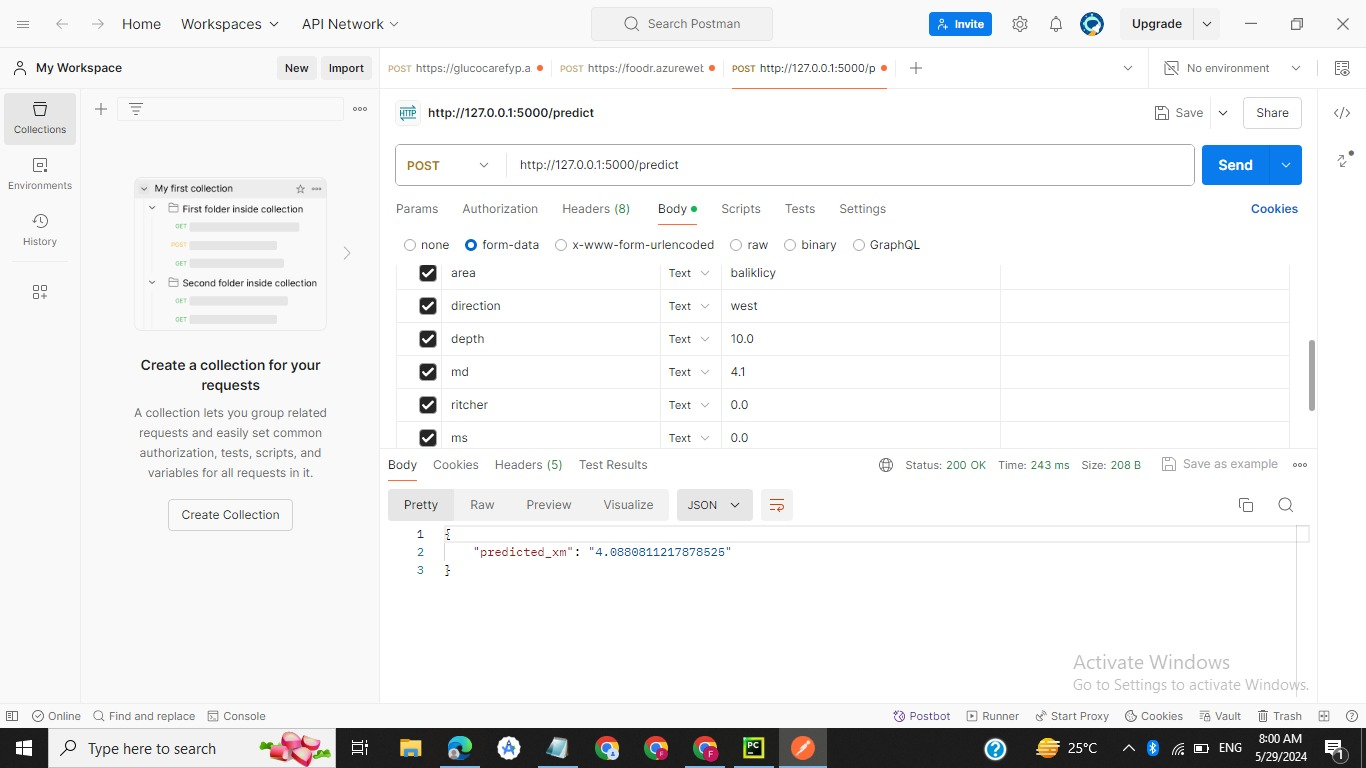

